In [1]:
import numpy as np # for performing mathematical calculations behind ML algorithms
import matplotlib.pyplot as plt # for visualization
import pandas as pd # for handling and cleaning the dataset
import seaborn as sns # for visualization
import sklearn # for model evaluation and development

In [2]:
data=pd.read_csv('car_age_price (1).csv')

In [3]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
data.tail()

,Year,Price
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000
111,2015,425000


In [5]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


Check for null value

In [6]:
data.isnull().sum()

Year     0
Price    0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [8]:
c = data.corr()
c

,Year,Price
Year,1.000000,0.776302
Price,0.776302,1.000000


Linear relationship between year and price

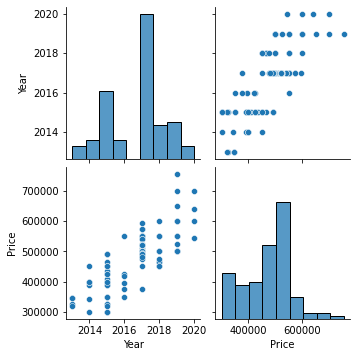

In [9]:
sns.pairplot(data)
plt.show()

In [11]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)

Build a regression model to predict 

Model Development

In [19]:
# spliting Dataset in Dependent & Independent Variables
y=data['Price']



In [22]:
x=data.drop(['Price'], axis=1)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [24]:
from sklearn.preprocessing import LabelEncoder

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=0)

In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
print('Model has been trained successfully')

Model has been trained successfully


Testing the model using the predict function

In [31]:
y_pred = model.predict(x_test)
y_pred

array([492838.80348982, 450981.71998338, 576552.9705027 , 492838.80348982,
       492838.80348982, 492838.80348982, 492838.80348982, 576552.9705027 ,
       492838.80348982, 492838.80348982, 409124.63647694, 409124.63647694,
       492838.80348982, 450981.71998338, 409124.63647694, 492838.80348982,
       492838.80348982, 576552.9705027 , 409124.63647694, 534695.88699626,
       492838.80348982, 492838.80348982, 492838.80348982, 492838.80348982,
       492838.80348982, 576552.9705027 , 450981.71998338, 534695.88699626,
       492838.80348982, 492838.80348982, 409124.63647694, 450981.71998338,
       534695.88699626, 409124.63647694])

In [32]:
testing_data_model_score = model.score(x_test, y_test)
print("Model Score/Performance on Testing data",testing_data_model_score)

training_data_model_score = model.score(x_train, y_train)
print("Model Score/Performance on Training data",training_data_model_score)

Model Score/Performance on Testing data 0.4726190788241381
Model Score/Performance on Training data 0.6291087878994693


Comparing the predicted values and actual values

In [33]:
df = pd.DataFrame(data={'Predicted value':y_pred,'Actual Value':y_test})
df

,Predicted value,Actual Value
26,492838.803490,550000
48,450981.719983,396000
10,576552.970503,500000
66,492838.803490,525000
96,492838.803490,520000
7,492838.803490,575000
91,492838.803490,520000
2,576552.970503,700000
90,492838.803490,520000
33,492838.803490,550000


Model Evaluation

R2 score: R2 score – R squared score. It is one of the statistical approaches by which we can find the variance or the spread of the target and feature data.

In [34]:
from sklearn.metrics import r2_score
r2Score = r2_score(y_pred, y_test)
print("R2 score of model is :" ,r2Score*100)

R2 score of model is : -42.35722904366603


MSE: MSE – Mean Squared Error. By using this approach we can find that how much the regression best fit line is close to all the residual.

In [35]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred, y_test)
print("Mean Squarred Error is :" ,mse*100)

Mean Squarred Error is : 339381639675.28046


RMSE: RMSE – Root Mean Squared Error. This is similar to the Mean squared error(MSE) approach, the only difference is that here we find the root of the mean squared error i.e. root of the Mean squared error is equal to Root Mean Squared Error. The reason behind finding the root is to find the more close residual to the values found by mean squared error.

In [36]:
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print("Root Mean Squarred Error is : ",rmse*100)

Root Mean Squarred Error is :  5825647.0857346


MAE: MAE – Mean Absolute Error. By using this approach we can find the difference between the actual values and predicted values but that difference is absolute i.e. the difference is positive.

In [37]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_pred,y_test)
print("Mean Absolute Error is :" ,mae)

Mean Absolute Error is : 47991.73707812995


Lasso regression

In [39]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=1)
reg.fit(x_train, y_train)

Lasso(alpha=1)

In [40]:
print('R squared training set', round(reg.score(x_train, y_train)*100, 2))
print('R squared test set', round(reg.score(x_test, y_test)*100, 2))

R squared training set 62.91
R squared test set 47.26


In [41]:
from sklearn.metrics import mean_squared_error

In [42]:
# Training data
pred_train = reg.predict(x_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 2))

MSE training set 3269155604.68


In [43]:
# Test data
pred = reg.predict(x_test)
mse_test =mean_squared_error(y_test, pred)
print('MSE test set', round(mse_test, 2))

MSE test set 3393831895.02


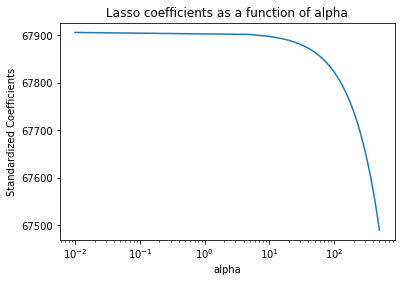

In [45]:
import numpy as np
import matplotlib.pyplot as plt

alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(x_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [46]:
from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
model = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model.fit(x_train, y_train)
LassoCV(cv=5, max_iter=10000, random_state=0)

LassoCV(cv=5, max_iter=10000, random_state=0)

In [47]:
model.alpha_

81.65978051445803

Best model

In [50]:
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(x_train, y_train)


Lasso(alpha=81.65978051445803)